# CIFAR-10 Classification with Different Deep Learning Architectures

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

## 2. Load CIFAR-10 Dataset

In [2]:
# Transform and load dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = trainset.classes

## 3. Define Models

In [3]:
# Model 1: Logistic Regression
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        return self.fc(x)

# Model 2: One Hidden Layer Fully Connected
class OneHiddenLayerNN(nn.Module):
    def __init__(self, hidden_size=512):
        super(OneHiddenLayerNN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# Model 3: CNN with one Conv Layer + MaxPool
class ConvNet(nn.Module):
    def __init__(self, out_channels=100, kernel_size=5, pool_size=14):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, out_channels, kernel_size)
        self.pool = nn.MaxPool2d(pool_size)
        self.fc = nn.Linear(out_channels * 3 * 3, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, x.numel() // x.size(0))
        return self.fc(x)

## 4. Training Function

In [4]:
def train_model(model, optimizer, criterion, trainloader, testloader, epochs=10):
    train_acc, test_acc = [], []
    for epoch in range(epochs):
        correct, total = 0, 0
        model.train()
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        acc = 100 * correct / total
        train_acc.append(acc)
        print(f'Epoch {epoch+1}, Train Accuracy: {acc:.2f}%')

        # Evaluate on test set
        correct, total = 0, 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        acc = 100 * correct / total
        test_acc.append(acc)
        print(f'Test Accuracy: {acc:.2f}%')
    return train_acc, test_acc

## 5. Train and Compare Models

In [5]:
# Example: Train Logistic Regression
model = LogisticRegression()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
train_acc, test_acc = train_model(
    model, optimizer, criterion, trainloader, testloader, epochs=10)

Epoch 1, Train Accuracy: 32.03%
Test Accuracy: 35.37%
Epoch 2, Train Accuracy: 34.33%
Test Accuracy: 34.85%
Epoch 3, Train Accuracy: 35.23%
Test Accuracy: 32.62%
Epoch 4, Train Accuracy: 35.36%
Test Accuracy: 32.87%
Epoch 5, Train Accuracy: 36.03%
Test Accuracy: 33.57%
Epoch 6, Train Accuracy: 36.01%
Test Accuracy: 35.86%
Epoch 7, Train Accuracy: 36.14%
Test Accuracy: 34.40%
Epoch 8, Train Accuracy: 36.51%
Test Accuracy: 33.67%
Epoch 9, Train Accuracy: 36.67%
Test Accuracy: 33.74%
Epoch 10, Train Accuracy: 36.78%
Test Accuracy: 31.60%


## 6. Plot Results

In [12]:
def plot_accuracy(train_acc, test_acc, title='Accuracy vs Epoch'):
    plt.figure(figsize=(8,5))
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(test_acc, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

## 7. Train Train and Plot All Models

Epoch 1, Train Accuracy: 41.61%
Test Accuracy: 46.26%
Epoch 2, Train Accuracy: 48.34%
Test Accuracy: 47.37%
Epoch 3, Train Accuracy: 51.82%
Test Accuracy: 47.08%
Epoch 4, Train Accuracy: 54.09%
Test Accuracy: 50.32%
Epoch 5, Train Accuracy: 56.36%
Test Accuracy: 50.49%
Epoch 6, Train Accuracy: 57.96%
Test Accuracy: 48.55%
Epoch 7, Train Accuracy: 59.62%
Test Accuracy: 51.00%
Epoch 8, Train Accuracy: 61.34%
Test Accuracy: 49.48%
Epoch 9, Train Accuracy: 62.88%
Test Accuracy: 49.29%
Epoch 10, Train Accuracy: 64.08%
Test Accuracy: 50.24%


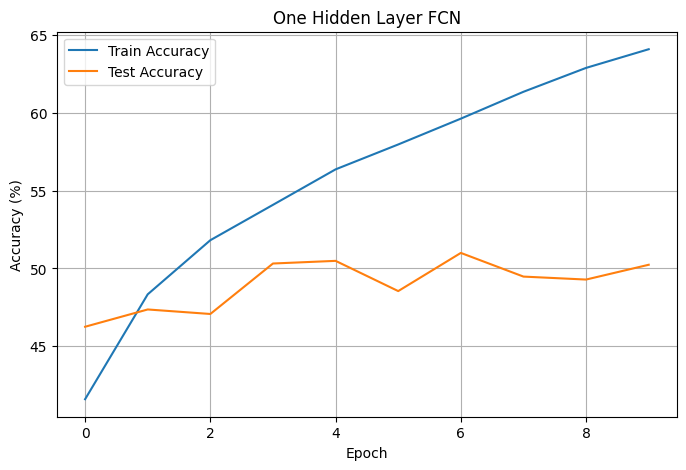

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x400 and 900x10)

In [7]:
# Train FCN with 1 hidden layer
model2 = OneHiddenLayerNN(hidden_size=512)
optimizer2 = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
train_acc2, test_acc2 = train_model(model2, optimizer2, criterion, trainloader, testloader)
plot_accuracy(train_acc2, test_acc2, title='One Hidden Layer FCN')

# Train CNN model
model3 = ConvNet(out_channels=100, kernel_size=5, pool_size=14)
optimizer3 = optim.SGD(model3.parameters(), lr=0.001, momentum=0.9)
train_acc3, test_acc3 = train_model(model3, optimizer3, criterion, trainloader, testloader)
plot_accuracy(train_acc3, test_acc3, title='CNN with MaxPool')

## Extra Credit 

In [8]:
class TunedCNN(nn.Module):
    def __init__(self):
        super(TunedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

       

Epoch 1, Train Accuracy: 49.88%
Test Accuracy: 59.97%
Epoch 2, Train Accuracy: 61.75%
Test Accuracy: 65.17%
Epoch 3, Train Accuracy: 66.38%
Test Accuracy: 66.66%
Epoch 4, Train Accuracy: 70.09%
Test Accuracy: 69.01%
Epoch 5, Train Accuracy: 72.47%
Test Accuracy: 68.73%
Epoch 6, Train Accuracy: 74.51%
Test Accuracy: 70.45%
Epoch 7, Train Accuracy: 76.34%
Test Accuracy: 69.08%
Epoch 8, Train Accuracy: 77.78%
Test Accuracy: 70.35%
Epoch 9, Train Accuracy: 78.88%
Test Accuracy: 69.57%
Epoch 10, Train Accuracy: 80.40%
Test Accuracy: 70.13%
Epoch 11, Train Accuracy: 81.13%
Test Accuracy: 69.24%
Epoch 12, Train Accuracy: 82.35%
Test Accuracy: 70.13%
Epoch 13, Train Accuracy: 83.39%
Test Accuracy: 70.24%
Epoch 14, Train Accuracy: 84.16%
Test Accuracy: 69.30%
Epoch 15, Train Accuracy: 84.57%
Test Accuracy: 69.55%
Epoch 16, Train Accuracy: 85.25%
Test Accuracy: 68.27%
Epoch 17, Train Accuracy: 85.77%
Test Accuracy: 70.79%
Epoch 18, Train Accuracy: 86.51%
Test Accuracy: 70.06%
Epoch 19, Train Acc

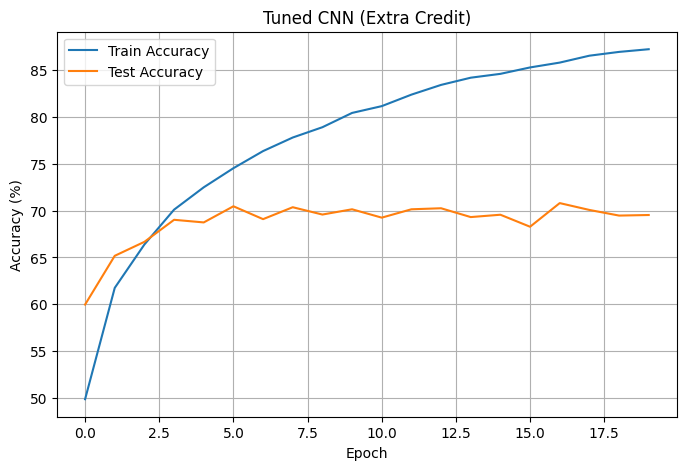

In [9]:
model4 = TunedCNN()
optimizer4 = optim.Adam(model4.parameters(), lr=0.001)
train_acc4, test_acc4 = train_model(model4, optimizer4, criterion, trainloader, testloader, epochs=20)
plot_accuracy(train_acc4, test_acc4, title='Tuned CNN (Extra Credit)')
